# Jupyter notebook problem set

## Importing all necessary libraries

In [9]:
import csv
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
import pandas as pd
import scipy as sci
import matplotlib.patches as mpatches


## Brief summary of what is the Iris data

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

source: https://en.wikipedia.org/wiki/Iris_flower_data_set

## Ploting the data

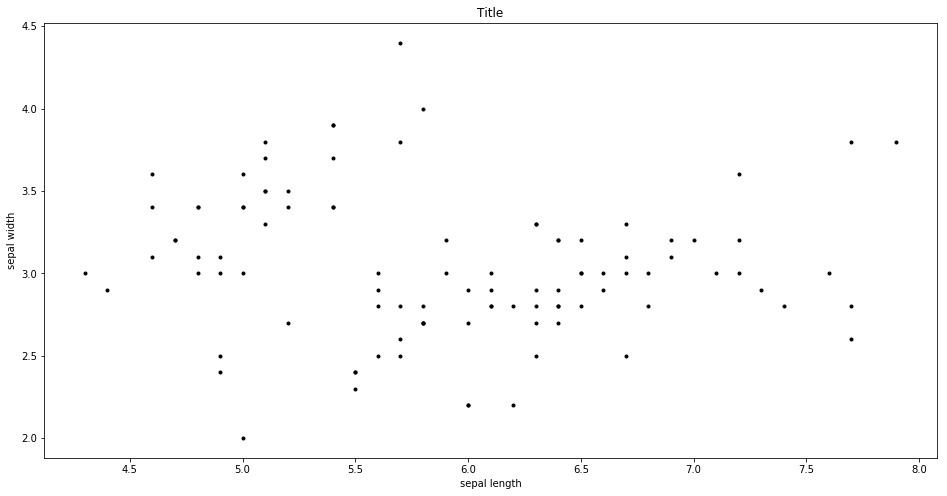

In [4]:
pl.rcParams['figure.figsize'] = (16.0, 8.0)

sepalLength=[]
sepalWidth =[]
petalLength=[]
petalWidth=[]
species=[]

with open("IRIS.csv","r") as dat:
    csvF = csv.reader(dat)
    for line in csvF:
        a=line[0].split(';')
        sepalLength.append(float(a[0]))
        sepalWidth.append(float(a[1]))
        petalLength.append(float(a[2]))
        petalWidth.append(float(a[3]))
        species.append(a[4])
        


pl.plot(sepalLength,sepalWidth,'k.')
pl.xlabel("sepal length")
pl.ylabel("sepal width")
pl.title("Title")
pl.legend()
pl.show()



## Ploting the data using differnt color for each specie of flower

Re-create the above plot, but this time plot the setosa data points in red, the versicolor data point in green, and the virginica data points in blue. Setosa, versicolor, and virginica are the three possible values of the species variable. Add a legend to the plot showing which species is in which colour.

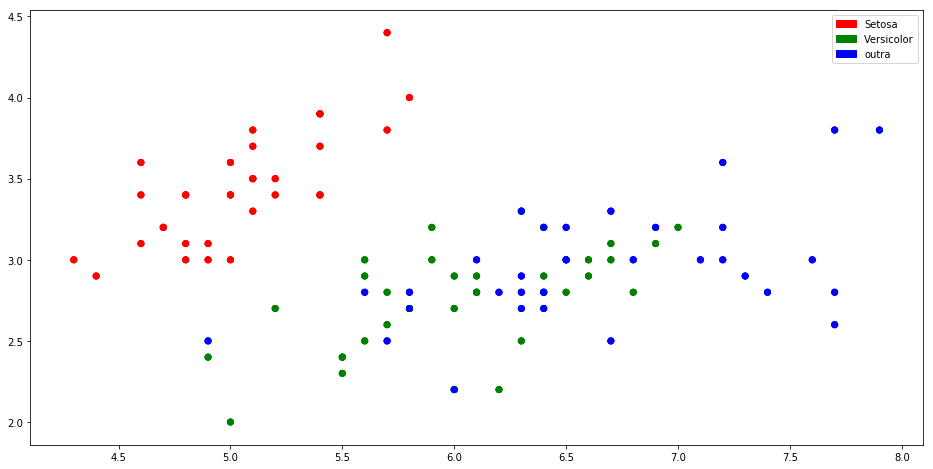

In [8]:

colors=[]
plSetosa=[]
pwSetosa=[]
for i in range(len(species)):
    if(species[i]=="setosa"):
        colors.append('r')
        plSetosa.append(petalLength[i])
        pwSetosa.append(petalWidth[i])
    elif(species[i]=="versicolor"):
        colors.append('g')
    else:
        colors.append('b')

pl.scatter(sepalLength, sepalWidth, color=colors)
pl.legend(handles=[mpatches.Patch(color='red', label='Setosa'),mpatches.Patch(color='green', label='Versicolor'),mpatches.Patch(color='blue', label='outra')])
pl.show()


## Using Seaborn to plot all data

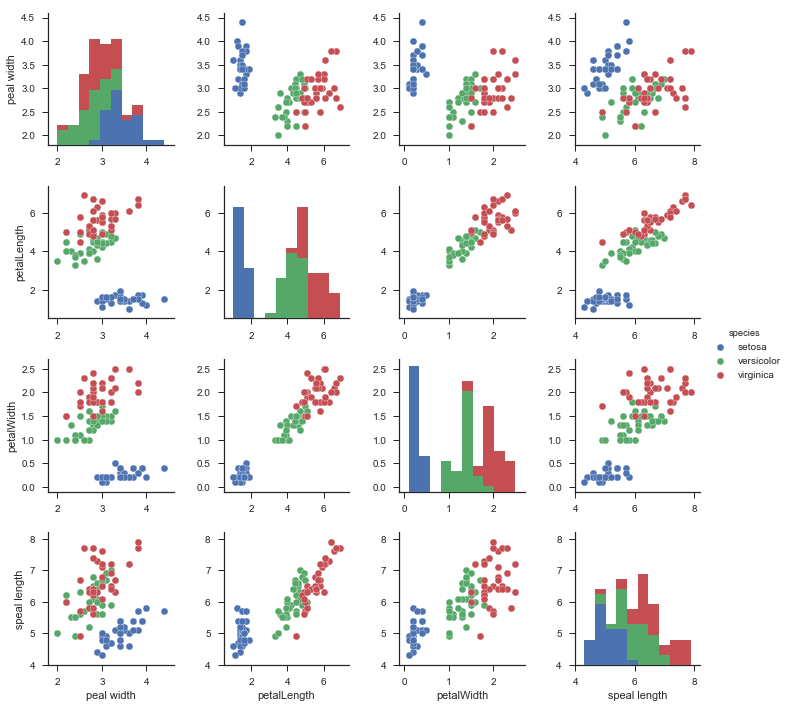

In [5]:
iris=pd.DataFrame({'speal length':sepalLength,'peal width':sepalWidth,'petalLength':petalLength,'petalWidth':petalWidth,'species':species})
sns.set(style="ticks")
sns.pairplot(iris, hue="species")
pl.show()

## Calculating the best fit and plotting

0.402806794945 -0.338208967332


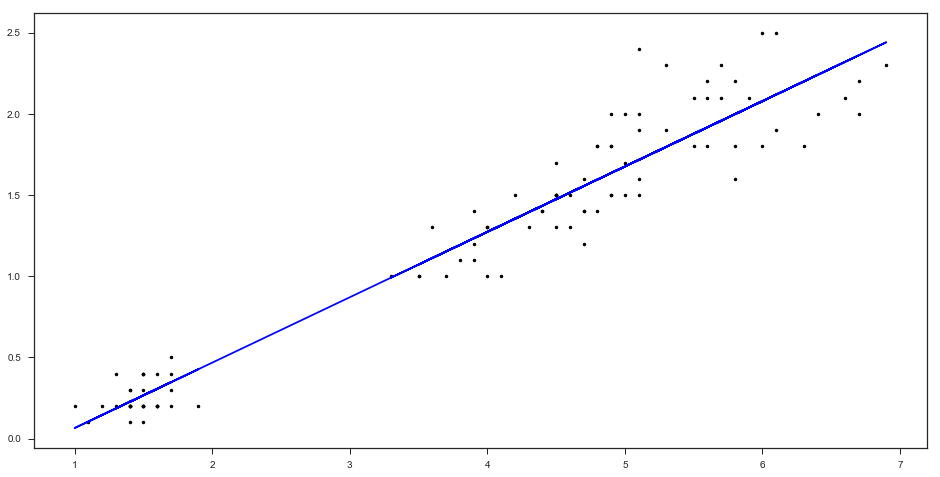

In [6]:
m, c = np.polyfit(petalLength, petalWidth, 1) 
b=[]
print(m,c)
for i in petalLength: 
    b.append(m*i+c)

pl.plot(petalLength, petalWidth, 'k.', label='Original data')
pl.plot(petalLength, b, 'b-', label='Best fit: $%0.1f x + %0.1f$' % (m,c))
pl.show()

## Calculating the coefficient of determination

In [7]:
slope ,intercept ,rValue,pValue,stderr  = sci.stats.linregress(petalLength, petalWidth)
print(rValue**2)

0.930390294033


## Calculating the best fit for setosa only

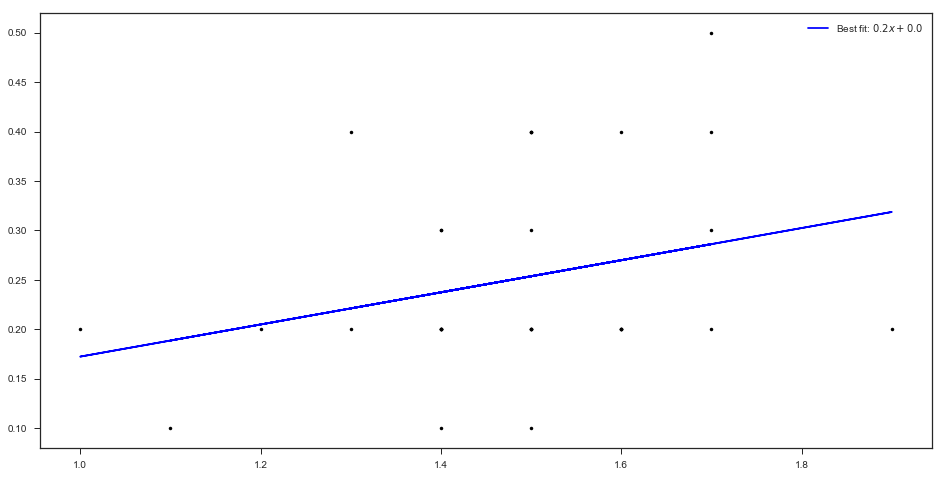

In [29]:
m,c = np.polyfit(plSetosa, pwSetosa, 1) 
b=[]

for i in plSetosa: 
    b.append(m*i+c)

pl.plot(plSetosa,pwSetosa,'k.')
pl.plot(plSetosa, b, 'b-', label='Best fit: $%0.1f x + %0.1f$' % (mm,cc))
pl.legend()
pl.show()


## Calculating the coefficient of determination for setosa

In [30]:
slope ,intercept ,rValue,pValue,stderr  = sci.stats.linregress(plSetosa, pwSetosa)
print(rValue)


## Manually calculating the best fit

In [31]:
def grad_m(x, y, mG, cG):
  return -2.0 * np.sum(x * (y - np.asarray(mG) * x - np.asarray(cG)))
def grad_c(x, y, mG , cG):
  return -2.0 * np.sum(y - np.asarray(mG) * x - np.asarray(cG))

eta = 0.0001
mGra, cGra = 1.0, 1.0
change = True

while change:
  mnew = mGra - eta * grad_m(plSetosa, pwSetosa, mGra, cGra)
  cnew = cGra - eta * grad_c(plSetosa, pwSetosa, mGra, cGra)
  if mGra == mnew and cGra == cnew:
    change = False
  else:
    mGra, cGra = mnew, cnew
    
print("gradient")
print(mGra, cGra)
print("polyfit")
print(m,c)

gradient
0.162611641515 0.00963966738539
polyfit
0.162611641515 0.00963966738528
